# Scikit-learn (sklearn)

* Jake VanderPlas. 2016. *Python Data Science Handbook: Essential Tools for Working with Data*. O'Reilly Media, Inc.
* Chapter 5 - Machine Learning
* https://github.com/jakevdp/PythonDataScienceHandbook

## 1. Scikit-learn - Introduction

* Powerful free and open-source (BSD license) machine learning library.
* Built on NumPy, SciPy, and matplotlib.
* Comprehensive Algorithms: Classification, Regression, Clustering, Dimensionality Reduction, Preprocessing, Model Selection, Feature Selection...
* Simple model interface:
    * `model = XXX()` &rarr; `model.fit(X, y)` &rarr; `model.predict(X_new)`
* Compatible with NumPy and Pandas data.
* Includes some ready to use popular reference datasets.

* Scikit-learn expects the data to be in a tabular format
    * Each **row** represents a single sample of the data.
    * Each **column** represents a feature of the data.

<center><img src="img/samples-features.png" alt="data shape" style="width: 60%;"/></center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import HTML
HTML("""<style>.dataframe {font-size: 80% !important;}</style>""")

sns.set()
mpl.rcParams['figure.figsize'] = (5.33,4)
mpl.rcParams['axes.labelsize'] = 10  # Example: 14 points
mpl.rcParams['xtick.labelsize'] = 8  # Example: 12 points for x-axis ticks
mpl.rcParams['ytick.labelsize'] = 8  # Example: 12 points for y-axis ticks

## 2. Selecting a classification dataset

### MNIST database (Modified National Institute of Standards and Technology)
<center><img src="img/MNIST.jpg" alt="MNIST" style="width: 60%;"/></center>

`fetch_openml` can be used to get some datasets:

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", data_home='~/.cache/scikit_learn_data', as_frame=False)

In [3]:
print(f'{type(mnist.data)=}\n{type(mnist.data)=}')
print(f'{mnist.data.shape=}\n{mnist.target.shape=}')
print(f'{mnist.data.max()=}\n{mnist.data.min()=}')
print(f'{np.unique(mnist.target)=}')

type(mnist.data)=<class 'numpy.ndarray'>
type(mnist.data)=<class 'numpy.ndarray'>
mnist.data.shape=(70000, 784)
mnist.target.shape=(70000,)
mnist.data.max()=255
mnist.data.min()=0
np.unique(mnist.target)=array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)


The dataset is quite balanced:

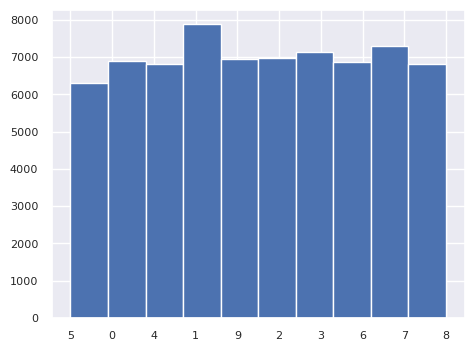

In [4]:
plt.hist(mnist.target);

Let's see some examples of the images:

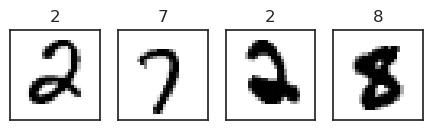

In [5]:
with sns.axes_style('white'):
    for i,idx in enumerate(np.random.randint(0,mnist.data.shape[0],4)):
        plt.subplot(1, 4, i+1)
        plt.imshow(mnist.data[idx].reshape(28,28), cmap=plt.cm.gray_r)
        plt.title(mnist.target[idx])
        plt.xticks([]) 
        plt.yticks([]) 

We can normalize (min-max scale) the values:

In [6]:
mnist.data = mnist.data / mnist.data.max()
mnist.target = mnist.target.astype('int')
print(f'{mnist.data.shape=}\n{mnist.target.shape=}')
print(f'{mnist.data.max()=}\n{mnist.data.min()=}')
print(f'{np.unique(mnist.target)=}')

mnist.data.shape=(70000, 784)
mnist.target.shape=(70000,)
mnist.data.max()=1.0
mnist.data.min()=0.0
np.unique(mnist.target)=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


Split the data, create some model, fit it and get the performance:

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(mnist.data, mnist.target, test_size=0.2, random_state=42)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)*100:.1f}%')

Accuracy: 92.0%


/opt/tljh/user/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Create a function that does everything (ignoring convergence warnings):

In [9]:
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

@ignore_warnings(category=ConvergenceWarning)
def fit_score(X_train, X_test, y_train, y_test):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

print(f'Accuracy: {fit_score(X_train, X_test, y_train, y_test)*100:.1f}%')

Accuracy: 92.0%


### Fashion MNIST (Fashion Modified National Institute of Standards and Technology database)
<center><img src="img/Fashion-MNIST.webp" alt="Fashion MNIST" style="width: 60%;"/></center>

The dataset is accessible through Kaggle:

In [10]:
#!pip install kagglehub
import kagglehub
path = kagglehub.dataset_download("zalando-research/fashionmnist")
print(path)

/home/jupyter-mpenagaricano/.cache/kagglehub/datasets/zalando-research/fashionmnist/versions/4


In [11]:
train_df = pd.read_csv(path + '/fashion-mnist_train.csv')
test_df = pd.read_csv(path + '/fashion-mnist_test.csv')
print(train_df.shape , test_df.shape)
train_df.head()

(60000, 785) (10000, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
X_train = train_df.drop('label', axis=1).to_numpy()
y_train = train_df['label'].to_numpy()
X_test = test_df.drop('label', axis=1).to_numpy()
y_test = test_df['label'].to_numpy()
print(f'{X_train.shape=}\n{y_train.shape=}')
print(f'{X_train.shape=}\n{y_train.shape=}')
print(f'{X_test.shape=}\n{y_test.shape=}')
print(f'{X_train.max()=}\n{X_train.min()=}')
print(f'{X_test.max()=}\n{X_test.min()=}')
print(f'{np.unique(y_train)}')

X_train.shape=(60000, 784)
y_train.shape=(60000,)
X_train.shape=(60000, 784)
y_train.shape=(60000,)
X_test.shape=(10000, 784)
y_test.shape=(10000,)
X_train.max()=255
X_train.min()=0
X_test.max()=255
X_test.min()=0
[0 1 2 3 4 5 6 7 8 9]


The dataset is perfectly balanced:

<Axes: >

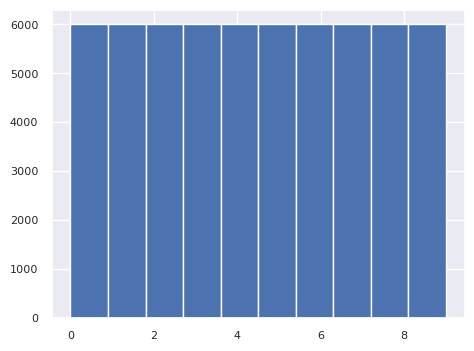

In [13]:
train_df['label'].hist()

<Axes: >

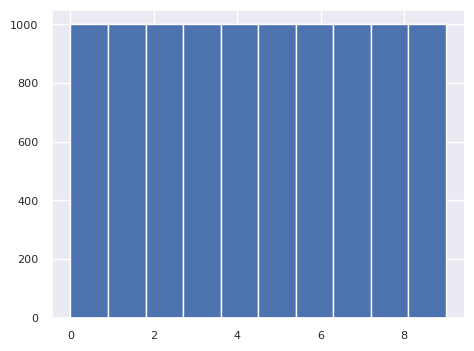

In [14]:
test_df['label'].hist()

Let's see some examples of the images:

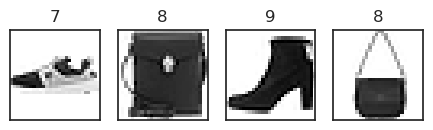

In [15]:
with sns.axes_style('white'):
    for i,idx in enumerate(np.random.randint(0,X_train.shape[0],4)):
        plt.subplot(1, 4, i+1)
        plt.imshow(X_train[idx].reshape(28,28), cmap=plt.cm.gray_r)
        plt.title(f'{y_train[idx]}')
        plt.xticks([]) 
        plt.yticks([]) 

We can normalize (min-max scale) the values:

In [16]:
X_train = train_df.drop('label', axis=1).to_numpy() / 255
y_train = train_df['label'].to_numpy()
X_test = test_df.drop('label', axis=1).to_numpy() /255
y_test = test_df['label'].to_numpy()
print(f'{X_train.shape=}\n{y_train.shape=}')
print(f'{X_test.shape=}\n{y_test.shape=}')
print(f'{X_train.max()=}\n{X_train.min()=}')
print(f'{X_test.max()=}\n{X_test.min()=}')
print(f'{np.unique(y_train)}')

X_train.shape=(60000, 784)
y_train.shape=(60000,)
X_test.shape=(10000, 784)
y_test.shape=(10000,)
X_train.max()=1.0
X_train.min()=0.0
X_test.max()=1.0
X_test.min()=0.0
[0 1 2 3 4 5 6 7 8 9]


In [17]:
print(f'Accuracy: {fit_score(X_train, X_test, y_train, y_test)*100:.1f}%')

Accuracy: 85.7%


**Named Tuples** are a good data structure for grouping information:

In [18]:
from collections import namedtuple
TrainTestData = namedtuple('TrainTestData', 'X_train X_test y_train y_test')
fmnist = TrainTestData(X_train, X_test, y_train, y_test)
fmnist_mini = TrainTestData(X_train[:6000,:], X_test[:1000,:], y_train[:6000], y_test[:1000])

In [19]:
@ignore_warnings(category=ConvergenceWarning)
def fit_score(data):
    model = LogisticRegression()
    model.fit(data.X_train, data.y_train)
    y_pred = model.predict(data.X_test)
    return accuracy_score(data.y_test, y_pred)

In [20]:
print(f'Accuracy: {fit_score(fmnist)*100:.1f}%')

Accuracy: 85.7%


In [21]:
print(f'Accuracy: {fit_score(fmnist_mini)*100:.1f}%')

Accuracy: 81.7%


## 3. Naive Bayes Classifier

* Probabilistic model based on Bayes' theorem:
$$P(Y~|~X) = \frac{P(X~|~Y) \cdot P(Y)}{P(X)}$$
    * $P(Y~|~X)$: **posterior** probability (of class $Y$ given features $X$)
    * $P(X~|~Y)$: **likelihood** (of observing $X$ given class $Y$)
    * $P(Y)$: **prior probability** (of class $Y$)
    * $P(X)$: **marginal** probability (of features $X$)
* Classification problem:
$$\hat{y} = \underset{y}{\mathrm{argmax}} ~ P(Y|X) = \underset{y}{\mathrm{argmax}}  ~  P(X|Y) \cdot P(Y)$$
* **Naive** assumption: features within each class are conditionally independent
$$P(X=[x_{1},\dots,x_{n}]~|~Y) = \prod_{i=1}^{n}{P(x_{i}|Y)}$$

### Gaussian Naive Bayes Classifier

* The likelihood of the features is assumed to be Gaussian
* `GaussianNB(*, priors=None, var_smoothing=1e-09)`
    * `priors`: Use instead of train data priors
* Naive &rarr; independent features ; diagonal covariance
    * variance: `model.var_`

<center><img src="img/GaussianNB.png" alt="Gaussian Naive Bayes Classifier" style="width: 60%;"/></center>

In [22]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(fmnist_mini.X_train, fmnist_mini.y_train)
model.var_.shape

(10, 784)

We can adapt the `fit_score` function to use any model:

In [23]:
from sklearn.naive_bayes import GaussianNB

def score(data, model):
    y_pred = model.predict(data.X_test)
    return accuracy_score(data.y_test, y_pred)
    
@ignore_warnings(category=ConvergenceWarning)
def fit_score(data, model):
    model.fit(data.X_train, data.y_train)
    return score(data, model)

In [24]:
model = GaussianNB()
print(f'Accuracy: {fit_score(fmnist_mini, model)*100:.1f}%')

Accuracy: 54.3%


This model has a much lower performance than `LogisticRegression`...

In [25]:
model = LogisticRegression()
print(f'Accuracy: {fit_score(fmnist_mini, model)*100:.1f}%')

Accuracy: 81.7%


## 4. Logistic Regression Classifier

### Binary Logistic Regression Classifier

* Assumes a linear relationship between the input features $\mathbf{x}$ and the logit of the posterior probability $P(y=1 | \mathbf{x})$:
$$\text{logit}(P) = \ln\left(\frac{P}{1-P}\right) = \mathbf{w}^T \mathbf{x} + b$$
$$P(y=1 | \mathbf{x}; \mathbf{w}, b) = \sigma(\mathbf{w}^T \mathbf{x} + b) = \frac{1}{1 + e^{-(\mathbf{w}^T \mathbf{x} + b)}}$$
* Loss function is Binary Cross-Entropy: $~ \text{-} \log P(y=y_{true} | \mathbf{x})$

### Multiclass Logistic Regression Classifier

* Assumes a linear relationship between the input features $\mathbf{x}$ and the *"logit vector"* of the posterior probabilities $P(y=j | \mathbf{x})$:
$$\text{logit}(\mathbf{P}) = \mathbf{W}^T \mathbf{x} + \mathbf{b}$$
$$P(y=j | \mathbf{x}; \mathbf{W}, \mathbf{b}) = \frac{e^{\mathbf{w}_j^T \mathbf{x} + b_j}}{\sum_{k=1}^{K} e^{\mathbf{w}_k^T \mathbf{x} + b_k}}$$
* Loss function is Categorical Cross-Entropy: $~ \text{-} \log P(y=y_{true} | \mathbf{x})$



* Scikit-learn's `LogisticRegression` supports binary and multiclass classification
* **Regularization**: add a penalty term to the cost function, reducing the *freedom* of the model.

`LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='deprecated', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)`
* `solver: {'lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'}, default='lbfgs'` &rarr; optimization algorithm
* `penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'` &rarr; norm used for regularization (penalize large weights)
* `C: float, default=1.0` &rarr; inverse of regularization strength
* `random_state: int, RandomState instance or None, default=None` &rarr; randomness of the algorithm


Let's try different solvers and regularization strengths:

In [26]:
for solver in ['lbfgs', 'newton-cg']:
    for C in [0.01, 0.1, 1, 10, 100] :
        model = LogisticRegression(solver=solver, C=C, random_state=42)
        print(f'{solver=}\t{C=}\t{fit_score(fmnist_mini, model)}')

solver='lbfgs'	C=0.01	0.811
solver='lbfgs'	C=0.1	0.834
solver='lbfgs'	C=1	0.817
solver='lbfgs'	C=10	0.809
solver='lbfgs'	C=100	0.81
solver='newton-cg'	C=0.01	0.816
solver='newton-cg'	C=0.1	0.833
solver='newton-cg'	C=1	0.829
solver='newton-cg'	C=10	0.815
solver='newton-cg'	C=100	0.806


Some notes:
* Whe are **using the test set** to select the hyperparameters
* There are tools for automatic search of optimum hyperparameters

### Grid Search for hyperparameter tuning
* `GridSearchCV` does Grid Search **using cross-validation**

In [27]:
from sklearn.model_selection import GridSearchCV

@ignore_warnings(category=ConvergenceWarning)
def search_hyperparameters(data, model, param_grid, cv=5, verbose=0):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                               cv=cv,scoring='accuracy',verbose=verbose
    )
    grid_search.fit(fmnist_mini.X_train, fmnist_mini.y_train)
    return grid_search

params = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['lbfgs', 'newton-cg']}
model = LogisticRegression(random_state=42)
grid_search = search_hyperparameters(fmnist_mini, model, params, verbose=2)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ...............................C=0.01, solver=lbfgs; total time=   0.4s
[CV] END ...............................C=0.01, solver=lbfgs; total time=   0.4s
[CV] END ...............................C=0.01, solver=lbfgs; total time=   0.4s
[CV] END ...............................C=0.01, solver=lbfgs; total time=   0.4s
[CV] END ...............................C=0.01, solver=lbfgs; total time=   0.4s
[CV] END ...........................C=0.01, solver=newton-cg; total time=   0.4s
[CV] END ...........................C=0.01, solver=newton-cg; total time=   0.5s
[CV] END ...........................C=0.01, solver=newton-cg; total time=   0.3s
[CV] END ...........................C=0.01, solver=newton-cg; total time=   0.3s
[CV] END ...........................C=0.01, solver=newton-cg; total time=   0.3s
[CV] END ................................C=0.1, solver=lbfgs; total time=   0.3s
[CV] END ................................C=0.1, 

The `grid_search` contains the result of the search:

In [28]:
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

grid_search.best_params_ = {'C': 0.1, 'solver': 'newton-cg'}
grid_search.best_score_ = 0.8423333333333334


Once we have selected the hyperparameters, we can get the performance on the test set: 

In [29]:
model = LogisticRegression(random_state=42, **grid_search.best_params_)
print(f'Accuracy: {fit_score(fmnist_mini, model)*100:.1f}%')

Accuracy: 83.3%


We have achieved a small improvement compared to the default parameters (**without touching the test set**):

In [30]:
model = LogisticRegression(random_state=42)
print(f'Accuracy: {fit_score(fmnist_mini, model)*100:.1f}%')

Accuracy: 81.7%


## 5. Support Vector Machine Classifier

* Find an **hyperplane** that *best* separates data points from different classes.
* **Support Vectors** are the data points that lie closest to the optimal hyperplane and define the margin.
* **GOAL**: Find the hyperplane that maximizes the margin
* Multiclass problems: *One-vs-One* or *One-vs-the-rest* schemes

<center><img src="img/svm1.png" alt="Support Vector Machine" style="width: 90%;"/></center>

* Often, real-world data is not linearly separable.
* Project the original data $\mathbf{x}$ into a **higher-dimensional** (even infinite) space $\phi(\mathbf{x})$ where a linear hyperplane can separate the classes.
* **Kernel Trick**: Calculate the scalar/dot product $K(\mathbf{x},\mathbf{y})=\phi(\mathbf{x}) \cdot \phi(\mathbf{y})$ without explicitly computing projected values $\phi(\mathbf{y})$
    * Kernels: Linear, Polynomial, Radial Basis Function (RBF), Sigmoid

<center>
<img src="img/svm2a.png" alt="SMV" style="width: 30%;"/>
<img src="img/svm2b.png" alt="SMV" style="width: 30%;"/>
<img src="img/svm2c.png" alt="SMV" style="width: 30%;"/>
</center>

`SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None))`
* `kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable,          default='rbf'` &rarr; kernel type
* `C: float, default=1.0` &rarr; inverse of regularization strength (penalty: squared l2)
* `random_state: int, RandomState instance or None, default=None` &rarr; randomness of the algorithm

In [31]:
from sklearn.svm import SVC

params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'poly', 'rbf']}
model = SVC(random_state=42)
grid_search = search_hyperparameters(fmnist_mini, model, params, verbose=2)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ...............................C=0.1, kernel=linear; total time=   1.3s
[CV] END ...............................C=0.1, kernel=linear; total time=   1.2s
[CV] END ...............................C=0.1, kernel=linear; total time=   1.2s
[CV] END ...............................C=0.1, kernel=linear; total time=   1.2s
[CV] END ...............................C=0.1, kernel=linear; total time=   1.2s
[CV] END .................................C=0.1, kernel=poly; total time=   2.3s
[CV] END .................................C=0.1, kernel=poly; total time=   2.5s
[CV] END .................................C=0.1, kernel=poly; total time=   2.7s
[CV] END .................................C=0.1, kernel=poly; total time=   2.7s
[CV] END .................................C=0.1, kernel=poly; total time=   2.2s
[CV] END ..................................C=0.1, kernel=rbf; total time=   3.6s
[CV] END ..................................C=0.1,

In [32]:
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

grid_search.best_params_ = {'C': 10, 'kernel': 'rbf'}
grid_search.best_score_ = 0.8658333333333333


Once we have selected the hyperparameters, we can get the performance on the test set: 

In [33]:
model = SVC(random_state=42, **grid_search.best_params_)
print(f'Accuracy: {fit_score(fmnist_mini, model)*100:.1f}%')

Accuracy: 85.7%


Improvement with respect to the default parameters:

In [34]:
model = SVC(random_state=42)
print(f'Accuracy: {fit_score(fmnist_mini, model)*100:.1f}%')

Accuracy: 84.7%


### Using OneVsRest Metaestimator
* `SVC` uses *One-vs-One* for multiclass problems
* `OneVsRestClassifier` is a *One-vs-the-rest* meta-estimator (model wrapper)

In [35]:
from sklearn.multiclass import OneVsRestClassifier

params = {'estimator__C': [0.1, 1, 10], 'estimator__kernel': ['linear', 'poly', 'rbf']}
model = OneVsRestClassifier(SVC(random_state=42))
grid_search = search_hyperparameters(fmnist_mini, model, params, cv=3, verbose=2)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END .........estimator__C=0.1, estimator__kernel=linear; total time=   4.0s
[CV] END .........estimator__C=0.1, estimator__kernel=linear; total time=   4.0s
[CV] END .........estimator__C=0.1, estimator__kernel=linear; total time=   3.9s
[CV] END ...........estimator__C=0.1, estimator__kernel=poly; total time=   5.1s
[CV] END ...........estimator__C=0.1, estimator__kernel=poly; total time=   4.9s
[CV] END ...........estimator__C=0.1, estimator__kernel=poly; total time=   5.6s
[CV] END ............estimator__C=0.1, estimator__kernel=rbf; total time=   7.9s
[CV] END ............estimator__C=0.1, estimator__kernel=rbf; total time=   7.8s
[CV] END ............estimator__C=0.1, estimator__kernel=rbf; total time=   8.1s
[CV] END ...........estimator__C=1, estimator__kernel=linear; total time=   4.0s
[CV] END ...........estimator__C=1, estimator__kernel=linear; total time=   3.6s
[CV] END ...........estimator__C=1, estimator__ke

In [36]:
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

grid_search.best_params_ = {'estimator__C': 10, 'estimator__kernel': 'rbf'}
grid_search.best_score_ = 0.86


Once we have selected the hyperparameters, we can get the performance on the test set: 

In [37]:
model = OneVsRestClassifier(SVC(random_state=42, kernel='rbf', C=10))
print(f'Accuracy: {fit_score(fmnist_mini, model)*100:.1f}%')

Accuracy: 86.2%


Improvement with respect to the default parameters:

In [38]:
model = OneVsRestClassifier(SVC(random_state=42))
print(f'Accuracy: {fit_score(fmnist_mini, model)*100:.1f}%')

Accuracy: 86.0%


## 6. Decision Tree Classifier

* Use a **tree-like structure** to classify data points based on a series of **decisions** or **rules**
    * In each node, decisions are made based on a single feature 
    * Threshold/range (numerical features) and value/sets (categorical features)
* Each node tries to create a rule that maximizes the **purity** of child nodes. 
* **GOAL**: Obtain terminal nodes with maximum purity.

<center><img src="img/decision-tree2.png" alt="Decision Tree" style="width: 60%;"/></center>

`DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)`
* `criterion : {"gini", "entropy", "log_loss"}, default="gini"` &rarr; purity criterion
* `splitter : {"best", "random"}, default="best"` &rarr; search split exhaustively (all features) or randomly (random subset of features)
* `max_depth : int, default=None` &rarr; maximum depth of the tree
* `random_state: int, RandomState instance or None, default=None` &rarr; randomness of the algorithm

In [39]:
from sklearn.tree import DecisionTreeClassifier

params = {
    'criterion' : ['gini', 'entropy'],
    'splitter' : ['best', 'random'] ,
    'max_depth' : [10, 12, 14]
}
model = DecisionTreeClassifier(random_state=42)
grid_search = search_hyperparameters(fmnist_mini, model, params, verbose=2)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ........criterion=gini, max_depth=10, splitter=best; total time=   1.3s
[CV] END ........criterion=gini, max_depth=10, splitter=best; total time=   1.3s
[CV] END ........criterion=gini, max_depth=10, splitter=best; total time=   1.3s
[CV] END ........criterion=gini, max_depth=10, splitter=best; total time=   1.3s
[CV] END ........criterion=gini, max_depth=10, splitter=best; total time=   1.4s
[CV] END ......criterion=gini, max_depth=10, splitter=random; total time=   0.2s
[CV] END ......criterion=gini, max_depth=10, splitter=random; total time=   0.2s
[CV] END ......criterion=gini, max_depth=10, splitter=random; total time=   0.2s
[CV] END ......criterion=gini, max_depth=10, splitter=random; total time=   0.2s
[CV] END ......criterion=gini, max_depth=10, splitter=random; total time=   0.2s
[CV] END ........criterion=gini, max_depth=12, splitter=best; total time=   1.5s
[CV] END ........criterion=gini, max_depth=12, s

In [40]:
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

grid_search.best_params_ = {'criterion': 'gini', 'max_depth': 12, 'splitter': 'random'}
grid_search.best_score_ = 0.7658333333333334


Once we have selected the hyperparameters, we can get the performance on the test set: 

In [41]:
model = DecisionTreeClassifier(random_state=42, **grid_search.best_params_)
print(f'Accuracy: {fit_score(fmnist_mini, model)*100:.1f}%')

Accuracy: 76.8%


Improvement with respect to the default parameters:

In [42]:
model = DecisionTreeClassifier(random_state=42)
print(f'Accuracy: {fit_score(fmnist_mini, model)*100:.1f}%')

Accuracy: 75.1%


## 7. Random Forest Classifier

* **Ensemble learning**: combine the predictions of multiple models to produce a more accurate and robust prediction than any of the constituent models alone.
* An ensemble of Decision Tree Classifiers
* Each tree is trained on a random subset of the data and a random selection of features.
* Classification is performed with mayority voting, averaging probabilities or by means of other aggregation functions.
* **GOAL**: Obtain more robust and accurate predictions than a single tree.

<center><img src="img/Random-forest.webp" alt="Random Forest" style="width: 60%;"/></center>

`RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None, monotonic_cst=None)`
* `n_estimators : int, default=100` &rarr; number of trees
* `criterion : {"gini", "entropy", "log_loss"}, default="gini"` &rarr; purity criterion
* `max_depth : int, default=None` &rarr; maximum depth of the trees
* `random_state: int, RandomState instance or None, default=None` &rarr; randomness of the algorithm

In [43]:
from sklearn.ensemble import RandomForestClassifier

params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [20, 30, 40]
}
model = RandomForestClassifier(random_state=42)
grid_search = search_hyperparameters(fmnist_mini, model, params, verbose=2)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END .......................criterion=gini, max_depth=20; total time=   4.3s
[CV] END .......................criterion=gini, max_depth=20; total time=   4.3s
[CV] END .......................criterion=gini, max_depth=20; total time=   4.3s
[CV] END .......................criterion=gini, max_depth=20; total time=   4.3s
[CV] END .......................criterion=gini, max_depth=20; total time=   4.3s
[CV] END .......................criterion=gini, max_depth=30; total time=   4.3s
[CV] END .......................criterion=gini, max_depth=30; total time=   4.3s
[CV] END .......................criterion=gini, max_depth=30; total time=   4.3s
[CV] END .......................criterion=gini, max_depth=30; total time=   4.3s
[CV] END .......................criterion=gini, max_depth=30; total time=   4.3s
[CV] END .......................criterion=gini, max_depth=40; total time=   4.4s
[CV] END .......................criterion=gini, m

In [44]:
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

grid_search.best_params_ = {'criterion': 'entropy', 'max_depth': 20}
grid_search.best_score_ = 0.8481666666666665


Once we have selected the hyperparameters, we can get the performance on the test set: 

In [45]:
model = RandomForestClassifier(random_state=42, **grid_search.best_params_)
print(f'Accuracy: {fit_score(fmnist_mini, model)*100:.1f}%')

Accuracy: 85.9%


Improvement with respect to the default parameters:

In [46]:
model = RandomForestClassifier(random_state=42)
print(f'Accuracy: {fit_score(fmnist_mini, model)*100:.1f}%')

Accuracy: 85.3%


## 8. Ensemble Classifier

* **Ensemble learning**: combine the predictions of multiple models to produce a more accurate and robust prediction than any of the constituent models alone.
* An ensemble of some of the previous classifiers

### Bagging Classifier
* Train the same classifier on random data subsets

<center><img src="img/bagging-classifier.png" alt="Ensemble Classifier" style="width: 90%;"/></center>

###  Voting Classifier
* Train different classifiers

<center><img src="img/voting-classifier.png" alt="Voting Classifier" style="width: 90%;"/></center>

`VotingClassifier(estimators, *, voting='hard', weights=None, n_jobs=None, flatten_transform=True, verbose=False)`
* `estimators` &rarr;  list of (str, estimator) tuples
* `voting : {'hard', 'soft'}, default='hard'` &rarr; majority rule voting vs argmax of the sums of the predicted probabilities

|               **Model** | Val Acc | Test Acc |
|------------------------:|:-------:|:--------:|
|         **Naive Bayes** |    -    |   54.3%  |
| **Logistic Regression** |  84.2%  |   83.3%  |
|             **SVM-OvO** |  86.6%  |   85.7%  |
|             **SVM-OvA** |  86.0%  |   86.2%  |
|       **Decision Tree** |  76.6%  |   76.8%  |
|       **Random Forest** |  84.8%  |   85.9%  |

In [47]:
from sklearn.ensemble import VotingClassifier

model1 = LogisticRegression(random_state=42, C=0.1, solver='newton-cg')
model2 = SVC(random_state=42, C=10, kernel='rbf')
model3 = RandomForestClassifier(random_state=42, criterion='entropy', max_depth=20)

model = VotingClassifier([('LR',model1),('SVM',model2),('RF',model3)])
print(f'Accuracy: {fit_score(fmnist_mini, model)*100:.1f}%')

Accuracy: 86.3%


In [48]:
model2 = SVC(random_state=42, C=10, kernel='rbf', probability=True)
model = VotingClassifier([('LR',model1),('SVM',model2),('RF',model3)], voting='soft')
print(f'Accuracy: {fit_score(fmnist_mini, model)*100:.1f}%')

Accuracy: 86.4%


|               **Model** | Val Acc | Test Acc |
|------------------------:|:-------:|:--------:|
|         **Naive Bayes** |    -    |   54.3%  |
| **Logistic Regression** |  84.2%  |   83.3%  |
|             **SVM-OvO** |  86.6%  |   85.7%  |
|             **SVM-OvA** |  86.0%  |   86.2%  |
|       **Decision Tree** |  76.6%  |   76.8%  |
|       **Random Forest** |  84.8%  |   85.9%  |
|       **Voting (hard)** |    -    |   86.3%  |
|       **Voting (soft)** |    -    |   86.4%  |

## 9. Regression Models

Some scikit-learn models that are specifically designed for regression:
* **LinearRegression**, **Ridge**, **Lasso**, **ElasticNet**, **KernelRidge**, **IsotonicRegression**...

Many classification models have their regression counterparts:
* **SVR** (Support Vector Regressio), **DecisionTreeRegressor**, **RandomForestRegressor**